<a href="https://colab.research.google.com/github/AmeerAliSaleem/MA4J5_Project/blob/main/Ameer_Ali_Saleem_MA4J5_three_class_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import regex as re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv("three_class_balanced.csv")

In [3]:
df.head()

,overall,reviewTime,reviewText,summary
0,Negative,"11 12, 2013",I could not read the entire story. The book wa...,nope
1,Neutral,"10 7, 2014",This was a sweet read.....i recommend if your ...,A sweet read.
2,Positive,"09 9, 2013",Greetings from Australia. A brilliant story. W...,Brilliant
3,Positive,"01 25, 2014",My first book from this author and I really li...,Beautiful
4,Positive,"02 24, 2016","Dark City is quite a dark novel, chilling and ...","Dark thriller, worth reading."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257070 entries, 0 to 257069
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     257070 non-null  object
 1   reviewTime  257070 non-null  object
 2   reviewText  257020 non-null  object
 3   summary     256972 non-null  object
dtypes: object(4)
memory usage: 7.8+ MB


# Text Preprocessing

In [5]:
df["reviewText"] = df["reviewText"].astype(str)

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
reviews_cleaned = []

for i in range(len(df["reviewText"])):
  reviews_raw = df["reviewText"].iloc[i]
  reviews_edit_1 = reviews_raw.lower()
  reviews_edit_2 = re.sub(r"[^a-zA-Z0-9\s\.]", "", reviews_edit_1) # Filter punctuation
  # reviews_edit_3 = re.sub(" \.|\. ", "", reviews_edit_2) # Get rid of fullstops that are outside of words
  reviews_cleaned.append(reviews_edit_2.strip()) # remove unnecessary whitespace and append to list of cleaned reviews


# vectorised code
# reviews_edit_1 = df["reviewText"].str.lower() # Convert all reviewText to lowercase
# reviews_edit_2 = reviews_edit_1.str.replace(r"[^a-zA-Z0-9\s\.]", "") # Filter that punctuation g
# reviews_cleaned = reviews_edit_2.str.strip().tolist() # Remove unnecessary whitespace

In [8]:
# remove stopwords from the cleaned list
filtered_reviews = [
    ' '.join(word for word in sentence.split() if word.lower() not in stopwords)
    for sentence in reviews_cleaned
]

In [9]:
# compare first record vs record with stopwords removed
print(reviews_cleaned[0])
print(filtered_reviews[0])

i could not read the entire story. the book was a complete waste of my time glad i got it as a freebie.
could read entire story. book complete waste time glad got freebie.


In [10]:
# observe first five filtered reviews + scores
for i in range(5):
  print(filtered_reviews[i])
  print(df["overall"][i])

could read entire story. book complete waste time glad got freebie.
Negative
sweet read.....i recommend looking something simple uncomplicated.
Neutral
greetings australia. brilliant story. knew could maintain interest tension conversation waitress old man. stephen king better job writing interesting prose seemingly mundane. highly recommended.
Positive
first book author really like her. follow writings. like dynamics work. characters easy understand follow. must read .
Positive
dark city quite dark novel chilling intricate kind read through. even havent read previous novels series case stand alone piece. starts somewhat familiar scenario private detective drinks smokes capable outwitting local police enforcement. yet typical really. even protagonist seems familiar rest characters quite different youd expect theyre interesting follow. plot interesting emotional twists turns bring feeling uneasiness alertness one loves getting good thriller. london atmosphere quite attractive well. enjo

## Train-test split

In [11]:
labels = list(df["overall"])

# Shuffle the data.

filtered_reviews, labels = zip(*random.sample(list(zip(filtered_reviews,labels)), len(filtered_reviews)))
filtered_reviews = list(filtered_reviews)
labels = list(labels)

# Train-test split (66:33)

trainsize = int(len(filtered_reviews)*0.66)

train_reviews, train_labels = filtered_reviews[:trainsize], labels[:trainsize]
test_reviews, test_labels = filtered_reviews[trainsize:], labels[trainsize:]

In [12]:
# Check distribution reviews in the training set

print("TRAINING SET")
print("Number of reviews to use for training is: {}.".format(len(train_labels)))
print("Number of positive reviews is: {} (or {:.1f}%).".format(sum(np.array(train_labels)=='Positive'),100*sum(np.array(train_labels)=='Positive')/len(train_labels)))
print("Number of neutral reviews is: {} (or {:.1f}%).".format(sum(np.array(train_labels)=='Neutral'),100*sum(np.array(train_labels)=='Neutral')/len(train_labels)))
print("Number of 3-negative reviews is: {} (or {:.1f}%).".format(sum(np.array(train_labels)=='Negative'),100*sum(np.array(train_labels)=='Negative')/len(train_labels)))

TRAINING SET
Number of reviews to use for training is: 169666.
Number of positive reviews is: 56504 (or 33.3%).
Number of neutral reviews is: 56682 (or 33.4%).
Number of 3-negative reviews is: 56480 (or 33.3%).


## Tokenisation

The word tokenizer provided by the Keras package will be able to deal with full stops for us, e.g. "missing." and "missing" will be treated as the same token.

Now for the tokenisation. In particular, we must conduct this separately on the training and test sets. The reason for this is due to so-called "data leakage": we do not want to introduce any elements of the testing data to the network before or during training. These two sets should be kept as separate as possible.

In [13]:
# max size of our vectorised corpus
vocab_size = 20000

# maximum allowed length for each vectorised sentence into our neural network
max_length = 50

# Tokenization
# OOV token deals with words that our tokenizer has not seen before (e.g. in the test set)
tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_reviews)
word_index = tokenizer.word_index

# print out our dictionary of vectors
# print(word_index)


train_sequences = tokenizer.texts_to_sequences(train_reviews)
test_sequences = tokenizer.texts_to_sequences(test_reviews)

# padding sequences to standardise the input size of each row of data for our NN
train_padded = pad_sequences(train_sequences, maxlen=max_length)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [21]:
type(train_labels[0])

str

In [23]:
# convert sentiment classes to numbers

sentiment_to_number = {'Positive':2, 'Neutral':1, 'Negative':0}

train_labels = [sentiment_to_number.get(item, item) for item in train_labels]
test_labels = [sentiment_to_number.get(item, item) for item in test_labels]

In [25]:
# print(test_labels)

# Model Building and Evaluation: 5-class setup

We now experiment with a variety of neural network architectures, with the aim of maximising the accuracy of our model on the *testing set*.

In [15]:
# function to plot and analyse the learning of each neural network
def learning_curve(history):
    plt.figure(figsize=(10,12))

    # Loss subplot.
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Testing loss')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy subplot.
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [16]:
# more model parameters
embedding_dim = 16
num_epochs = 15
batch_size = 1000

### Experimenting with model architectures
---

In [17]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(3, activation='softmax')
])
model0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            320000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 320051 (1.22 MB)
Trainable params: 320051 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
history0 = model0.fit(train_padded, tf.one_hot(train_labels,3), batch_size=batch_size, epochs=num_epochs, validation_data=(test_padded, tf.one_hot(test_labels,3)), verbose=2)

Epoch 1/15
170/170 - 3s - loss: 1.0760 - accuracy: 0.5104 - val_loss: 1.0399 - val_accuracy: 0.5725 - 3s/epoch - 18ms/step
Epoch 2/15
170/170 - 2s - loss: 0.9844 - accuracy: 0.6300 - val_loss: 0.9296 - val_accuracy: 0.6596 - 2s/epoch - 12ms/step
Epoch 3/15
170/170 - 2s - loss: 0.8784 - accuracy: 0.6677 - val_loss: 0.8413 - val_accuracy: 0.6646 - 2s/epoch - 12ms/step
Epoch 4/15
170/170 - 3s - loss: 0.8044 - accuracy: 0.6818 - val_loss: 0.7869 - val_accuracy: 0.6803 - 3s/epoch - 19ms/step
Epoch 5/15
170/170 - 2s - loss: 0.7578 - accuracy: 0.6933 - val_loss: 0.7541 - val_accuracy: 0.6884 - 2s/epoch - 12ms/step
Epoch 6/15
170/170 - 3s - loss: 0.7273 - accuracy: 0.7011 - val_loss: 0.7336 - val_accuracy: 0.6929 - 3s/epoch - 18ms/step
Epoch 7/15
170/170 - 3s - loss: 0.7063 - accuracy: 0.7075 - val_loss: 0.7201 - val_accuracy: 0.6946 - 3s/epoch - 18ms/step
Epoch 8/15
170/170 - 2s - loss: 0.6907 - accuracy: 0.7126 - val_loss: 0.7108 - val_accuracy: 0.6979 - 2s/epoch - 12ms/step
Epoch 9/15
170/1

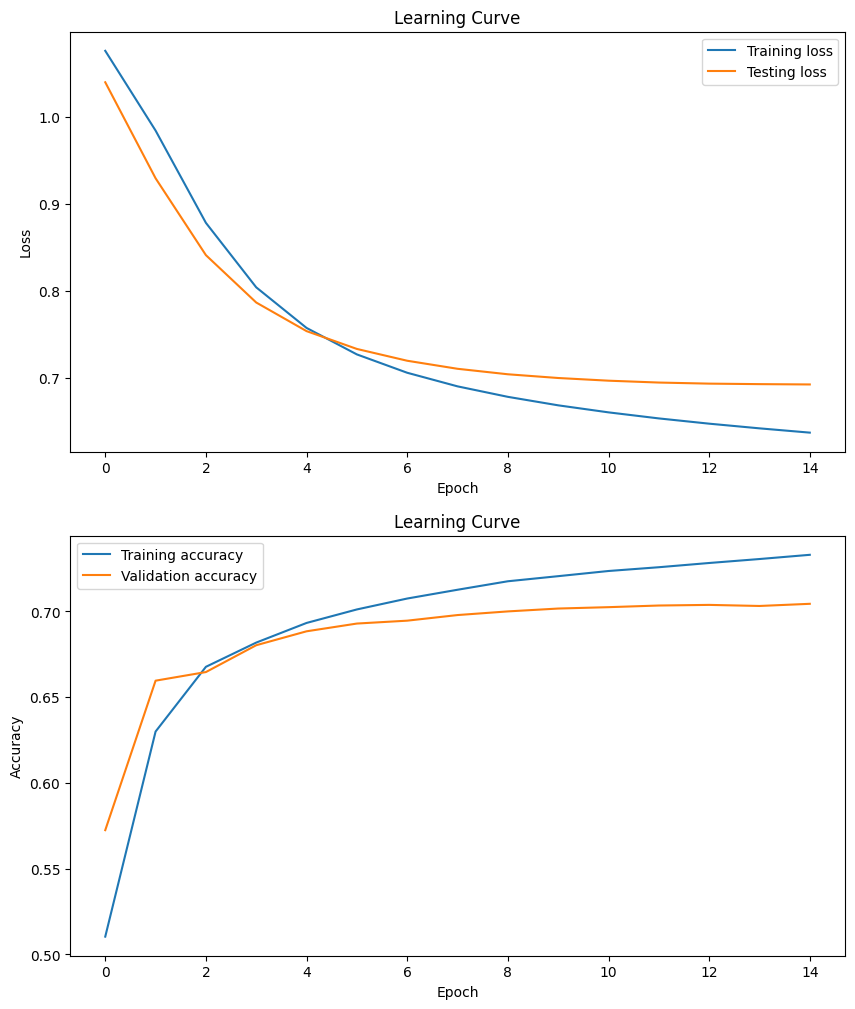

In [27]:
learning_curve(history0)

In [38]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 16)            320000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 16)                1600      
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 3)                 27        
                                                                 
Total params: 321763 (1.23 MB)
Trainable params: 321763 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history1 = model1.fit(train_padded, tf.one_hot(train_labels,3), batch_size=batch_size, epochs=num_epochs, validation_data=(test_padded, tf.one_hot(test_labels,3)), verbose=2)

Epoch 1/15
170/170 - 26s - loss: 0.9608 - accuracy: 0.4593 - val_loss: 0.8177 - val_accuracy: 0.6285 - 26s/epoch - 154ms/step
Epoch 2/15
170/170 - 20s - loss: 0.7358 - accuracy: 0.6736 - val_loss: 0.7023 - val_accuracy: 0.6894 - 20s/epoch - 120ms/step
Epoch 3/15
170/170 - 20s - loss: 0.6507 - accuracy: 0.7209 - val_loss: 0.6843 - val_accuracy: 0.7001 - 20s/epoch - 116ms/step
Epoch 4/15
170/170 - 20s - loss: 0.6169 - accuracy: 0.7402 - val_loss: 0.6873 - val_accuracy: 0.6995 - 20s/epoch - 115ms/step
Epoch 5/15
170/170 - 17s - loss: 0.5963 - accuracy: 0.7511 - val_loss: 0.6945 - val_accuracy: 0.6972 - 17s/epoch - 102ms/step
Epoch 6/15
170/170 - 17s - loss: 0.5799 - accuracy: 0.7596 - val_loss: 0.7032 - val_accuracy: 0.6924 - 17s/epoch - 101ms/step
Epoch 7/15
170/170 - 20s - loss: 0.5675 - accuracy: 0.7663 - val_loss: 0.7184 - val_accuracy: 0.6934 - 20s/epoch - 117ms/step
Epoch 8/15
170/170 - 18s - loss: 0.5541 - accuracy: 0.7728 - val_loss: 0.7255 - val_accuracy: 0.6812 - 18s/epoch - 104

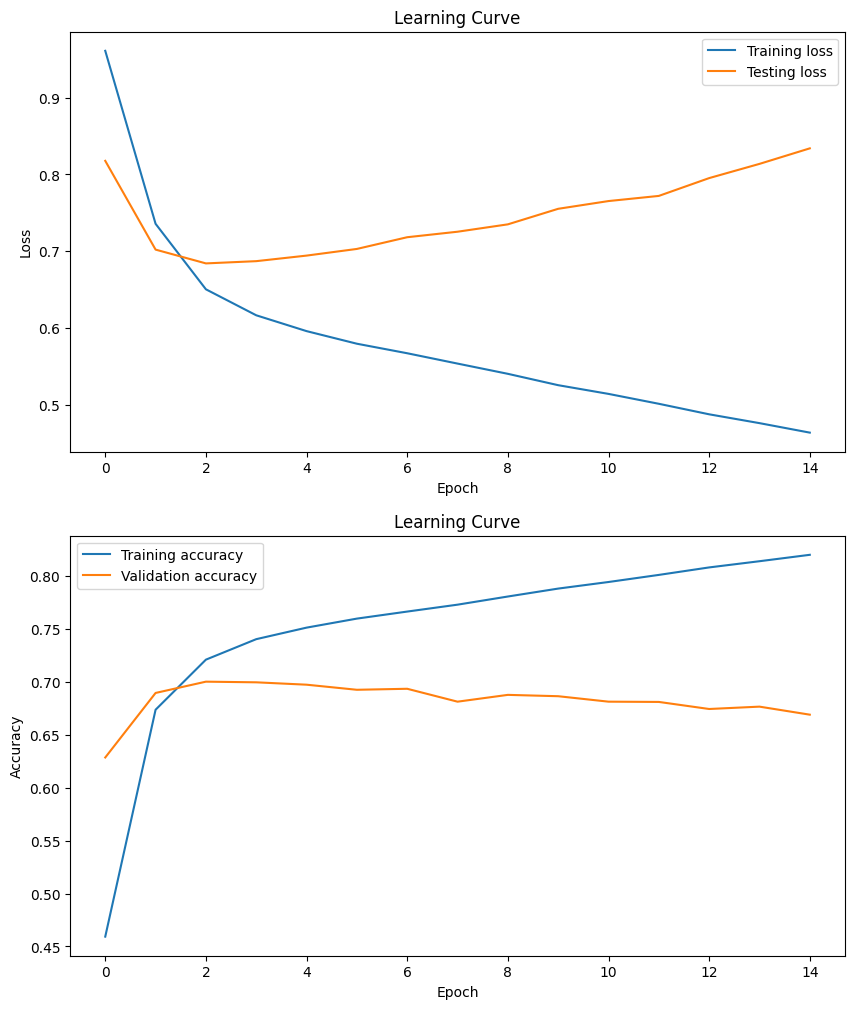

In [41]:
learning_curve(history1)